In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]



In [3]:
data1 = pd.read_csv('creditcard.csv', sep=',')
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#Create independent and Dependent Features
data = data1.sample(frac = 0.05,random_state=1)
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]

In [10]:
### Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [11]:
len(X_train)

9968

In [12]:
### Over sampling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [13]:
len(X_train)

19908

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

In [15]:
from sklearn import tree
model_DT = tree.DecisionTreeClassifier()
Model_DT = model_DT.fit(X_train, y_train)

In [16]:
model_pred = model_DT.predict(X_test)

In [13]:
model_DT.score(X_test, y_test)

0.9982445874780573

In [17]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4266
           1       0.67      0.33      0.44         6

    accuracy                           1.00      4272
   macro avg       0.83      0.67      0.72      4272
weighted avg       1.00      1.00      1.00      4272



In [18]:
cf_matrix = confusion_matrix(y_test, model_pred)
cf_matrix

array([[4265,    1],
       [   4,    2]], dtype=int64)

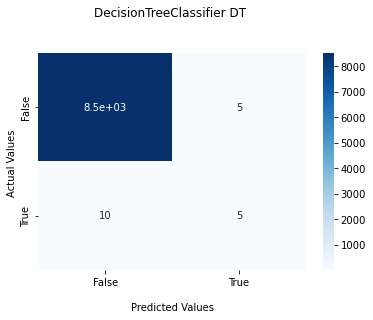

In [16]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('DecisionTreeClassifier DT \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
### Model for Hybrid Approach 

from sklearn.metrics import explained_variance_score, mean_squared_error
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
lr = LogisticRegression()
estimators = [model, model_DT] # SVM and DT model together 
clf_stack = StackingClassifier(classifiers =estimators, meta_classifier = lr)

In [ ]:
model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test) 

In [43]:
acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack)

accuracy score of Stacked model: 0.9991924440855307


In [ ]:
print(classification_report(y_test, model_pred))

In [46]:
cf_matx = confusion_matrix(y_test, pred_stack)
cf_matx

array([[56848,    27],
       [   19,    68]], dtype=int64)

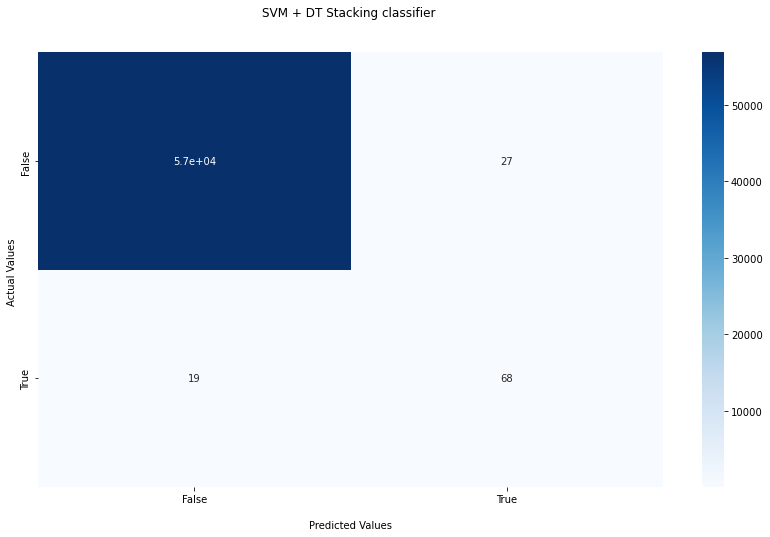

In [48]:
import seaborn as sns

ax = sns.heatmap(cf_matx, annot=True, cmap='Blues')

ax.set_title('SVM + DT Stacking classifier \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()